In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

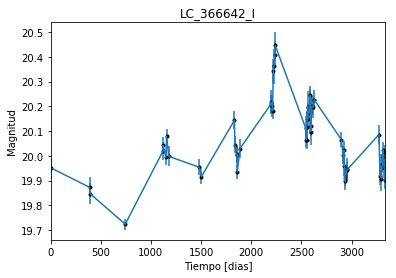

In [2]:
data = np.genfromtxt('LC_366642_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_366642_I')
plt.savefig("LC_366642_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

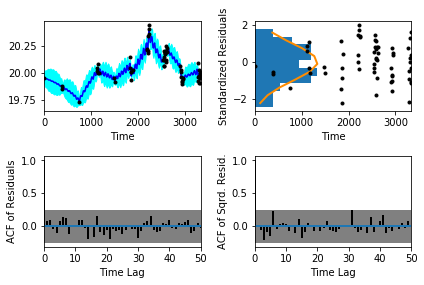

In [5]:
sample.assess_fit()

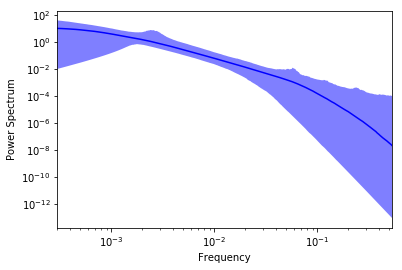

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

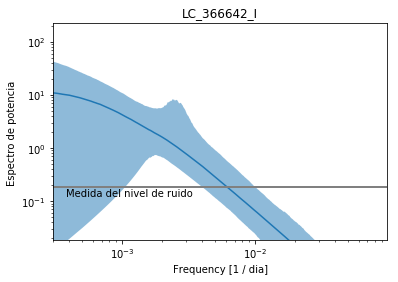

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_366642_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_366642_I')

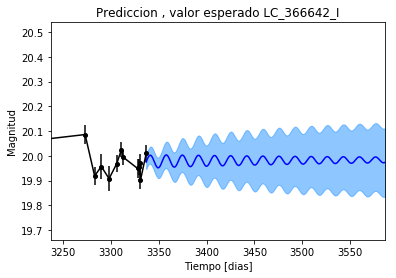

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_366642_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_366642_I')

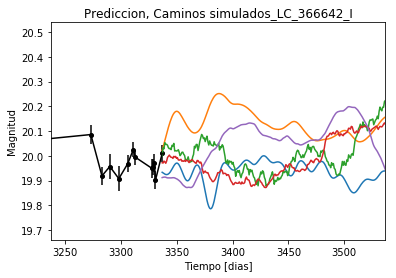

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_366642_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


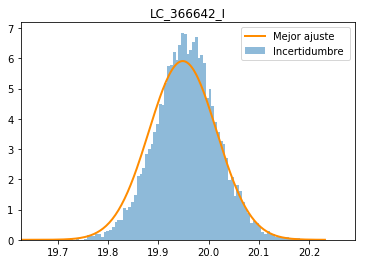

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_366642_I')
plt.savefig("Mejor_ajuste_LC_366642_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_366642_I')

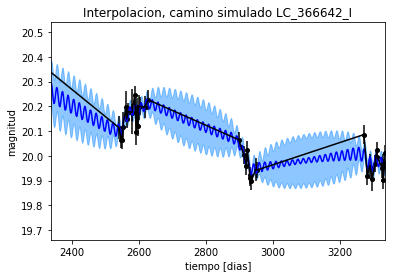

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_366642_I')

Text(0.5,1,'Interpolacion, camino simulado LC_366642_I')

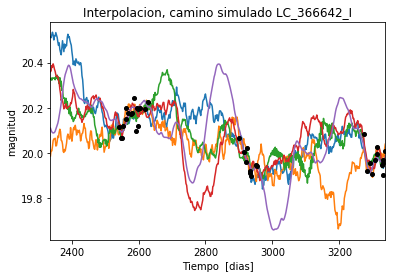

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_366642_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 897.136774045
Median: 0.0217860163364
Standard deviation: 0.204200192906
68% credibility interval: [ 0.00200362  0.19917588]
95% credibility interval: [  4.03507712e-04   8.43331363e-01]
99% credibility interval: [  3.25551403e-04   1.00751496e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 639.698209276
Median: 0.0137180680979
Standard deviation: 0.12659754507
68% credibility interval: [ 0.00102396  0.09740951]
95% credibility interval: [  3.50137399e-04   4.70789901e-01]
99% credibility interval: [  3.10001263e-04   8.51726905e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 714.328326121
Median: 0.0721839470846
St

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1446.66361916
Median: 109.263898204
Standard deviation: 1.8134845386
68% credibility interval: [ 107.21671799  110.576103  ]
95% credibility interval: [ 104.42997655  111.40370063]
99% credibility interval: [ 102.41394217  111.95517822]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 547.886389209
Median: 1.24541650503
Standard deviation: 2.58220689841
68% credibility interval: [ 0.24702123  4.79749483]
95% credibility interval: [ 0.06391789  9.41408353]
99% credibility interval: [  0.02399328  12.40404835]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 201583.597712
Median: 2.43634308633
Standard deviation: 12.8045392534
68% credibility interval: [  0.16501219  20.69048082]
95% credibility interval: [  2.41036626e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 337.426386941
Median: 3.75248354618e-32
Standard deviation: 1.19375087481e+78
68% credibility interval: [  8.60652207e-63   6.48399987e+13]
95% credibility interval: [  3.54752219e-168   2.89817263e+066]
99% credibility interval: [  6.71721111e-172   1.57211200e+078]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1990.20922519
Median: 20.0129524495
Standard deviation: 0.0750534837723
68% credibility interval: [ 19.94421306  20.07645689]
95% credibility interval: [ 19.85396772  20.15458682]
99% credibility interval: [ 19.77771018  20.25025597]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 302.441503658
Median: 0.117984432499
Standard deviation: 0.296161585318
68% credibility interval: [ 0.          0.61216339]
95% credibility interval: [ 0.          0.97247522]
99% credibility interval: [ 0.          1.04259144]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 302.441503658
Median: 0.117984432499
Standard deviation: 0.296161585318
68% credibility interval: [ 0.          0.61216339]
95% credibility interval: [ 0.          0.97247522]
99% credibility interval: [ 0.          1.04259144]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 397.649456293
Median: 0.0
Standard deviation: 0.000730019368368
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1446.66361916
Median: 109.263898204
Standard deviation: 1.8134845386
68% credibility interval: [ 107.21671799  110.576103  ]
95% credibility interval: [ 104.42997655  111.40370063]
99% credibility interval: [ 102.41394217  111.95517822]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1356.24943504
Median: 0.0306911028853
Standard deviation: 0.0182985258694
68% credibility interval: [ 0.01959189  0.04922   ]
95% credibility interval: [ 0.01348087  0.08437779]
99% credibility interval: [ 0.01078352  0.11176328]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1873.66732441
Median: 0.968653530765
Standard deviation: 0.179023321223
68% credibility interval: [ 0.81410456  1.16568186]
95% credibility interval: [ 0.69452429  1.38513154]
99% credibility interval: [ 0.62058529  1.55342443]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 355.496700263
Median: 0.00648540308411
Standard deviation: 0.38457468741
68% credibility interval: [  5.44126333e-17   1.74894479e-01]
95% credibility interval: [  7.02331808e-69   1.22171873e+00]
99% credibility interval: [  1.16157587e-79   2.48260896e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 897.136774045
Median: (-0.136885577747-2.67022069265j)
Standard deviation: 2.26028282951
68% credibility interval: [-1.25145898-2.27293127j -0.01258914-4.13337958j]
95% credibility interval: [ -5.29880723e+00+0.j         -2.53531373e-03-0.0159138j]
99% credibility interval: [ -6.33040319e+00+0.j          -2.04549979e-03-0.01357675j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 639.698209276
Median: (-0.0861931639154+0.188564636148j)
Standard deviation: 2.02371852833
68% credibility interval: [-0.61204201+1.09741099j -0.00643376+0.j        ]
95% credibility interval: [ -2.95806019e+00+5.44433339j  -2.19997816e-03+0.00662562j]
99% credibility interval: [ -5.35155797e+00+4.66235848j  -1.94779538e-03+0.j        ]
Poster